In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mv drive/MyDrive/Project3data/*.rar drive/MyDrive/Project3data/actions/

In [ ]:
mkdir drive/MyDrive/Project3data

In [ ]:
import tensorflow.keras as tf
import tensorflow_datasets as tfds
import numpy as np
import os
import glob
import cv2

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2


import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
dir = 'drive/MyDrive/Project3data/UCF11_updated_mpg/'

classes = tuple(os.listdir(dir))

testpath = glob.glob(dir+classes[0]+'/*/*.mpg')

classesdict = {classes[i]: i for i in range(len(classes))}

print(classesdict.keys())
print(len(testpath))
classes

dict_keys(['basketball', 'biking', 'diving', 'golf_swing', 'horse_riding', 'soccer_juggling', 'swing', 'tennis_swing', 'trampoline_jumping', 'volleyball_spiking', 'walking'])
138


('basketball',
 'biking',
 'diving',
 'golf_swing',
 'horse_riding',
 'soccer_juggling',
 'swing',
 'tennis_swing',
 'trampoline_jumping',
 'volleyball_spiking',
 'walking')

In [ ]:
print(testpath[1])
cap = cv2.VideoCapture(testpath[1])
print(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)/cap.get(cv2.CAP_PROP_FPS)))
print(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)/5))
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print(21%int(cap.get(cv2.CAP_PROP_FRAME_COUNT)/5))
# print(21%0)

drive/MyDrive/Project3data/UCF11_updated_mpg/basketball/v_shooting_01/v_shooting_01_03.mpg
4
29
148.0


In [ ]:
def visualize(X, y, arr):
  # for images, labels in train.take(1):
  for i in range(len(arr)):
    fig = plt.figure(figsize=(10,10))
    img = X[arr[i]]
    
    print(classes[y[arr[i]]])
    for j in range(5):
      plt.subplot(1, 5, j+1)
      plt.imshow(img[j].astype("uint8"))
      plt.axis("off")
      
    plt.show()
      # if (j == 2):
      #   plt.title(classes[y[random[i]]])



def FrameCapture(path):
  
  vid = cv2.VideoCapture(path)

  framecount = int(vid.get(cv2.CAP_PROP_FRAME_COUNT)/5)

  ret = True
  #get only 5 frames at a time
  i = 0
  count = 0

  frames = []

  while ret and count < 5:

    ret, image = vid.read()

    if ret and (i % framecount) == 0:
      resize = cv2.resize(image,(224,224))
      frames.append(resize)
      count += 1
      
    i += 1

  return np.array(frames)


def traindata():
  samples = []
  target = []

  for label in classesdict.keys():
    for path in glob.glob(dir+label+'/*/*.mpg'):

      samples.append(FrameCapture(path))
      # print("path:", path)
      target.append(classesdict[label])

  return samples, target


def graph(H, epochs):

  plt.style.use('ggplot')
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history['loss'], label = 'train_loss')
  plt.plot(np.arange(0, epochs), H.history['val_loss'], label = 'val_loss')
  plt.plot(np.arange(0, epochs), H.history['accuracy'], label = 'train_acc')
  plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label = 'val_acc')
      
  # add labels and legend
  plt.title('Training Loss and Accuracy')
  plt.xlabel('Epoch #')
  plt.ylabel('Loss/Accuracy')
  plt.legend()

In [ ]:
X, y = traindata()

X = np.stack(X,axis = 0)
y = np.array(y)


print(X.shape)
print(y.shape)

(1597, 5, 224, 224, 3)
(1597,)


In [ ]:
normX = X.astype('float32')/255.0
# normY = y.astype('float32')/255.0
processedy = to_categorical(y, 11)

trainX, devX = train_test_split(normX, test_size=0.2, random_state=1337)
trainY, devY = train_test_split(processedy, test_size=0.2, random_state=1337)

devX, testX = train_test_split(devX, test_size=0.5, random_state=1337)
devY, testY = train_test_split(devY, test_size=0.5, random_state=1337)

# trainY = to_categorical(trainY, 11)
# devY = to_categorical(devY,11)

print(trainX.shape)
print(trainY.shape)


print(devX.shape)
print(testY.shape)

(1277, 5, 224, 224, 3)
(1277, 11)
(160, 5, 224, 224, 3)
(160, 11)


basketball


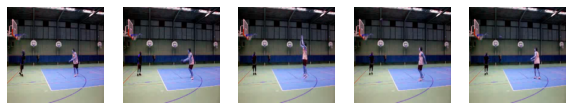

diving


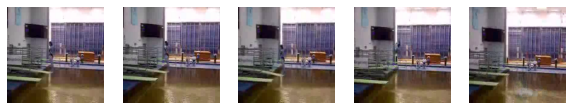

horse_riding


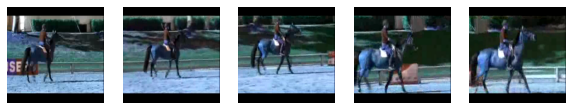

swing


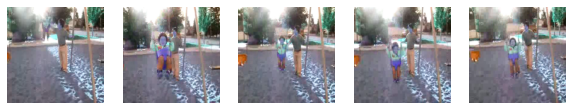

trampoline_jumping


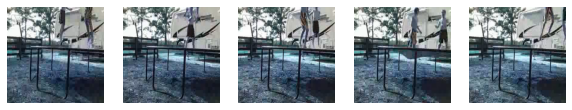

In [ ]:
random = [int(i) for i in range(0, len(X), int(len(X)/5))]

randomtest = [int(i) for i in range(0, len(testX), int(len(testX)/5))]

visualize(X,y, random)

In [ ]:
def rnn():
  model = Sequential()
  #224 * 244 * 3
  model.add(Input(shape = (5, 150528)))

  # model.add(Embedding())

  model.add(SimpleRNN(64))

  model.add(Dense(64, activation = 'relu'))

  model.add(Dense(11, activation = 'sigmoid'))
  
  return model

In [ ]:
rnnV1 = rnn()
rnnV1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                9637952   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 11)                715       
                                                                 
Total params: 9,642,827
Trainable params: 9,642,827
Non-trainable params: 0
_________________________________________________________________


In [ ]:
flatX = np.reshape(trainX, (1277, 5, -1))

flatXtest = np.reshape(testX, (160, 5, -1))
 
print(flatX.shape)

(1277, 5, 150528)


Epoch 1/10
32/32 [==============================] - 3s 63ms/step - loss: 2.4352 - accuracy: 0.1107 - val_loss: 2.3898 - val_accuracy: 0.1562
Epoch 2/10
32/32 [==============================] - 1s 45ms/step - loss: 2.3999 - accuracy: 0.1038 - val_loss: 2.3866 - val_accuracy: 0.1484
Epoch 3/10
32/32 [==============================] - 1s 45ms/step - loss: 2.3864 - accuracy: 0.1263 - val_loss: 2.3867 - val_accuracy: 0.1562
Epoch 4/10
32/32 [==============================] - 1s 44ms/step - loss: 2.3957 - accuracy: 0.1224 - val_loss: 2.4147 - val_accuracy: 0.1211
Epoch 5/10
32/32 [==============================] - 1s 43ms/step - loss: 2.3967 - accuracy: 0.1077 - val_loss: 2.3949 - val_accuracy: 0.1133
Epoch 6/10
32/32 [==============================] - 1s 43ms/step - loss: 2.3884 - accuracy: 0.1117 - val_loss: 2.3796 - val_accuracy: 0.1562
Epoch 7/10
32/32 [==============================] - 1s 44ms/step - loss: 2.3892 - accuracy: 0.1234 - val_loss: 2.3745 - val_accuracy: 0.1562
Epoch 8/10
32

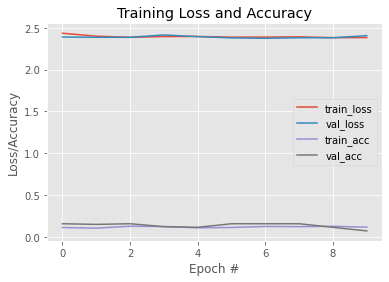

In [ ]:
rnnV1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
H = rnnV1.fit(flatX, trainY, validation_split=0.2, epochs = 10, batch_size=32)
graph(H, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Testing Classification Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        17
           5       0.10      1.00      0.18        16
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00        12

    accuracy                           0.10       160
   macro avg       0.01      0.09      0.02       160
weighted avg       0.01      0.10      0.02       160

soccer_juggling


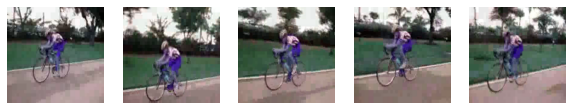

soccer_juggling


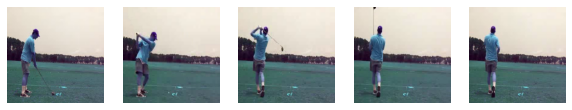

soccer_juggling


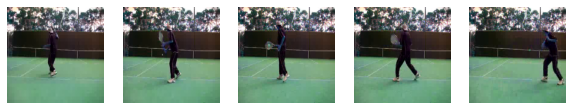

soccer_juggling


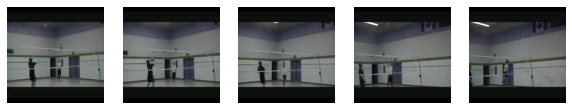

soccer_juggling


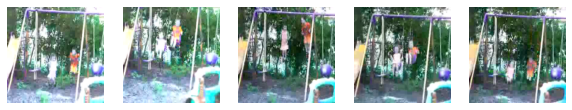

In [ ]:
sigmoidrnnpredY = rnnV1.predict(flatXtest)

rnnpredY = sigmoidrnnpredY.argmax(axis=1)
testYlabel = testY.argmax(axis=1)

print('\nTesting Classification Report:\n\n', classification_report(testYlabel, rnnpredY))

visualize(testX*255, rnnpredY, randomtest)

In [ ]:
def cnnlstm():
  seqinput = Input(shape=(5,224,224,3), name = 'input')
  
  cnninput = Input(shape=(224,224,3), name = 'baseinput')

  cnnbase = MobileNetV2(input_tensor=cnninput, weights='imagenet', include_top=False, alpha=0.35)

  cnnout = GlobalAveragePooling2D()(cnnbase.output)
  
  cnn = Model(cnnbase.input, cnnout)
  
  cnn.trainable = False

  encodedframes = TimeDistributed(cnn)(seqinput)
  
  encodedsequence = LSTM(128)(encodedframes)

  x = Dense(1024, activation = 'relu')(encodedsequence)
  
  output = Dense(11, activation='sigmoid')(x)
  
  model = Model(seqinput, output)
  
  return model
  # return 0


In [ ]:
tf.backend.clear_session()
cnnlstmV1 = cnnlstm()
cnnlstmV1.summary()

2031616/2019640 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5, 224, 224, 3)]  0         
                                                                 
 time_distributed (TimeDistr  (None, 5, 1280)          410208    
 ibuted)                                                         
                                                                 
 lstm (LSTM)                 (None, 128)               721408    
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                                 
 dense_1 (Dense)             (None, 11)                11275     
                                                                 
Total params: 1,274,987
Trainable params: 864,779
Non-trainabl

Epoch 1/10
32/32 [==============================] - 20s 177ms/step - loss: 1.4190 - accuracy: 0.5534 - val_loss: 0.6799 - val_accuracy: 0.7539
Epoch 2/10
32/32 [==============================] - 3s 87ms/step - loss: 0.4334 - accuracy: 0.8668 - val_loss: 0.4918 - val_accuracy: 0.8633
Epoch 3/10
32/32 [==============================] - 3s 87ms/step - loss: 0.1900 - accuracy: 0.9403 - val_loss: 0.2788 - val_accuracy: 0.9219
Epoch 4/10
32/32 [==============================] - 3s 86ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.2477 - val_accuracy: 0.9297
Epoch 5/10
32/32 [==============================] - 3s 89ms/step - loss: 0.0470 - accuracy: 0.9912 - val_loss: 0.2293 - val_accuracy: 0.9453
Epoch 6/10
32/32 [==============================] - 3s 90ms/step - loss: 0.0191 - accuracy: 0.9961 - val_loss: 0.2192 - val_accuracy: 0.9453
Epoch 7/10
32/32 [==============================] - 3s 87ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2359 - val_accuracy: 0.9414
Epoch 8/10


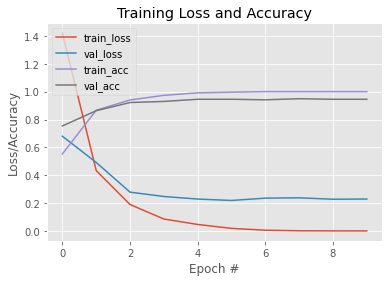

In [ ]:
cnnlstmV1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
H = cnnlstmV1.fit(trainX, trainY, validation_split=0.2, epochs = 10, batch_size=32)
graph(H, 10)


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        12
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00        17
           5       0.86      0.75      0.80        16
           6       1.00      0.93      0.96        14
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00         7
          10       0.85      0.92      0.88        12

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160

biking


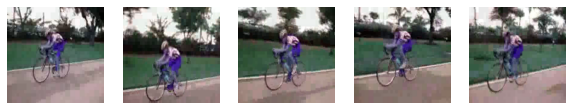

golf_swing


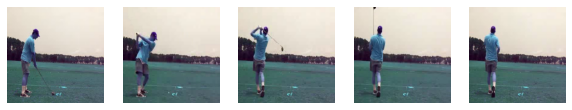

tennis_swing


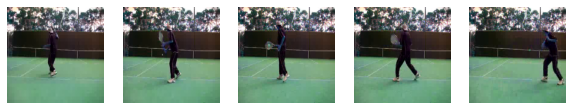

volleyball_spiking


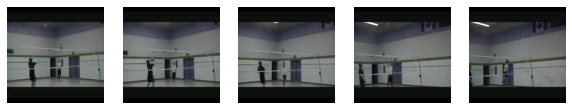

swing


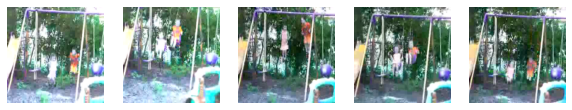

[ 10.19  100.00  0.21  0.01  8.51  7.85  1.05  0.09  8.66  0.86  83.62]
[ 13.90  0.31  0.10  100.00  0.12  76.33  1.13  50.87  41.18  0.25  2.25]
[ 15.69  0.03  0.04  97.81  0.57  96.70  0.07  99.97  8.09  0.98  1.02]
[ 97.57  4.64  3.56  0.40  0.56  16.20  0.10  9.36  0.25  100.00  5.63]
[ 0.73  58.62  3.43  2.15  0.04  19.36  100.00  0.09  94.66  1.24  0.52]


In [ ]:
sigmoidcnnlstmpredY = cnnlstmV1.predict(testX)
cnnlstmpredY = sigmoidcnnlstmpredY.argmax(axis=1)
testYlabel = testY.argmax(axis=1)

print('\nTesting Classification Report:\n\n', classification_report(testYlabel, cnnlstmpredY))
# print(cnnlstmpredY[]])
# print(randomtest)
visualize(testX*255, cnnlstmpredY, randomtest)

np.set_printoptions(formatter = {'float':'{: 0.2f}'.format},suppress=True)

for i in randomtest:
  print(sigmoidcnnlstmpredY[i]*100)

### Use CNN and put it in TimeDistributed so that it pass through the LSTM layer

In [ ]:
def bilstm():
  seqinput = Input(shape=(5,224,224,3), name = 'input')
  
  cnninput = Input(shape=(224,224,3), name = 'baseinput')

  cnnbase = MobileNetV2(input_tensor=cnninput, weights='imagenet', include_top=False, alpha=0.35)

  cnnout = GlobalAveragePooling2D()(cnnbase.output)
  
  cnn = Model(cnnbase.input, cnnout)
  
  cnn.trainable = False

  encodedframes = TimeDistributed(cnn)(seqinput)
  
  encodedsequence = Bidirectional(LSTM(128, return_sequences=True))(encodedframes)

  encodedsequence = Bidirectional(LSTM(128))(encodedsequence)

  x = Dense(1024, activation = 'relu')(encodedsequence)
  
  output = Dense(11, activation='sigmoid')(x)
  
  model = Model(seqinput, output)
  
  return model

In [ ]:
tf.backend.clear_session()
bilstmV1 = bilstm()
bilstmV1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5, 224, 224, 3)]  0         
                                                                 
 time_distributed (TimeDistr  (None, 5, 1280)          410208    
 ibuted)                                                         
                                                                 
 bidirectional (Bidirectiona  (None, 5, 256)           1442816   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1024)              263168    
                                                           

Epoch 1/10
40/40 [==============================] - 18s 181ms/step - loss: 1.1573 - accuracy: 0.6218 - val_loss: 0.5957 - val_accuracy: 0.8125
Epoch 2/10
40/40 [==============================] - 3s 87ms/step - loss: 0.3529 - accuracy: 0.8739 - val_loss: 0.3715 - val_accuracy: 0.8750
Epoch 3/10
40/40 [==============================] - 3s 85ms/step - loss: 0.1422 - accuracy: 0.9514 - val_loss: 0.4713 - val_accuracy: 0.8313
Epoch 4/10
40/40 [==============================] - 3s 85ms/step - loss: 0.1051 - accuracy: 0.9624 - val_loss: 0.2935 - val_accuracy: 0.9187
Epoch 5/10
40/40 [==============================] - 3s 86ms/step - loss: 0.0501 - accuracy: 0.9836 - val_loss: 0.2635 - val_accuracy: 0.9375
Epoch 6/10
40/40 [==============================] - 3s 85ms/step - loss: 0.0491 - accuracy: 0.9820 - val_loss: 0.3005 - val_accuracy: 0.9250
Epoch 7/10
40/40 [==============================] - 3s 85ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.2903 - val_accuracy: 0.8938
Epoch 8/10


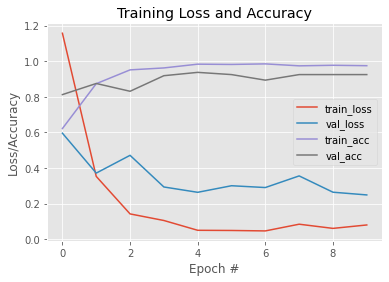

In [ ]:
bilstmV1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
H = bilstmV1.fit(trainX, trainY, validation_data=(devX,devY), epochs = 10, batch_size=32)
graph(H, 10)


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.89      1.00      0.94        16
           2       1.00      1.00      1.00        12
           3       0.88      1.00      0.93        14
           4       1.00      1.00      1.00        17
           5       1.00      0.50      0.67        16
           6       1.00      0.93      0.96        14
           7       0.93      1.00      0.97        14
           8       0.88      1.00      0.94        15
           9       1.00      1.00      1.00         7
          10       0.77      0.83      0.80        12

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.92       160
weighted avg       0.93      0.93      0.92       160

biking


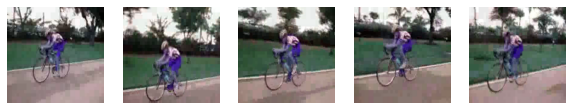

biking


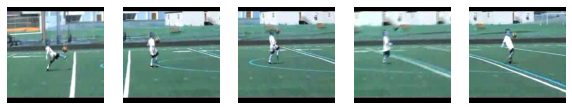

biking


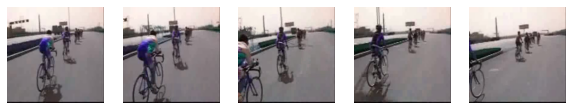

biking


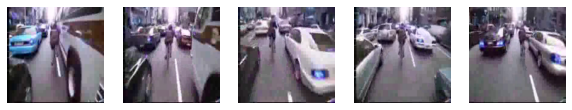

biking


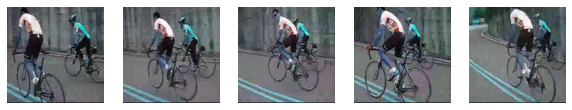

In [ ]:
sigmoidbilstmpredY = bilstmV1.predict(testX)
bilstmpredY = sigmoidbilstmpredY.argmax(axis=1)
testYlabel = testY.argmax(axis=1)

print('\nTesting Classification Report:\n\n', classification_report(testYlabel, bilstmpredY))

indices = np.where(bilstmpredY==1)[0]

visualize(testX*255, bilstmpredY, indices)

In [ ]:
newsamples = np.array([FrameCapture('drive/MyDrive/Project3data/actions/walk/walk/Gossip1953256kb_walk_f_cm_np1_fr_med_1.avi')])

# newsamples = np.stack(newsamples,axis = 0)
newsamples = newsamples.astype('float32')/255.0
newsamples.shape

      # print("path:", path)

(1, 5, 224, 224, 3)

### Test on data outside of the source
Testing for overfitting


For 'walking', the dataset used for training consisted of 'walking_dogs' so, the test below might be a little useless.

{'basketball': 0, 'biking': 1, 'diving': 2, 'golf_swing': 3, 'horse_riding': 4, 'soccer_juggling': 5, 'swing': 6, 'tennis_swing': 7, 'trampoline_jumping': 8, 'volleyball_spiking': 9, 'walking': 10}
[[ 0.03  0.73  0.93  0.04  0.24  0.09  0.09  0.79  0.98  0.06  0.02]]
trampoline_jumping


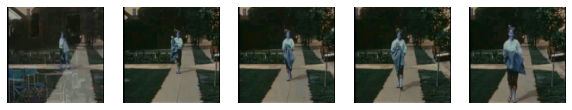

In [ ]:
sigmoidtestpredY = bilstmV1.predict(newsamples)
bilstmtestpredY = sigmoidtestpredY.argmax(axis=1)
print(classesdict)
print(sigmoidtestpredY)
visualize(newsamples*255, bilstmtestpredY, [0])